In [3]:
import numpy as np
import matplotlib.pyplot as plt


# (a) plot and compare

In [4]:
tau=1
x0=10
c=-5
dt=0.1

def analyticalsolution(t):
    return c+(x0-c)*np.exp(-t/tau)

### Finite Difference solution

In [5]:
trange=[0,10]
tvalues=np.arange(trange[0],trange[1],dt)
allx=np.zeros(len(tvalues))
allx[0]=x0
for step in range(1,len(tvalues)):
    allx[step]=allx[step-1] + dt/tau*(-allx[step-1]+c)

### Built-in solver

In [6]:
from scipy.integrate import solve_ivp

def dx_dt(t, x):
    return 1/tau*(-x+c)

xsolution=solve_ivp(dx_dt, trange, [x0])

### Compare results

Text(0,0.5,'x(t)')

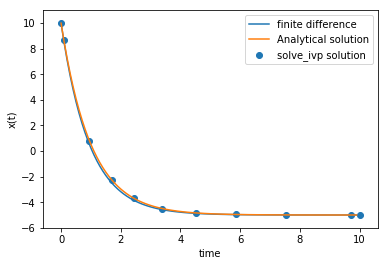

In [7]:
plt.plot(tvalues,allx,label='finite difference')
plt.scatter(xsolution.t,xsolution.y[0],label='solve_ivp solution')
plt.plot(tvalues,analyticalsolution(tvalues),label='Analytical solution')
plt.legend()
plt.xlabel('time')
plt.ylabel('x(t)')

# (b) Time to decay

In [8]:
import scipy

In [9]:
tau=1
x0=10
c=0

trange=[0,10]

def analyticalsolution(t):
    return c+(x0-c)*np.exp(-t/tau)


In [10]:
# true analytical solution
np.log(10)

2.302585092994046

In [11]:
# use a root finder, to get the zero, from the analytical solution
scipy.optimize.newton(lambda t: analyticalsolution(t)-0.1*x0,0)

2.3025850929940455

In [19]:
# find zero using built-in solver.
# If use the setting dense_output=True, then can evaluate continuously
xsolution=solve_ivp(dx_dt, trange, [x0],dense_output=True)
# if use dense_output=True, then can evaluate as a function.  
# Note that it returns an array of values, with the solution for each initial condition.
# So, to solve we will want to take the first element
xsolution.sol(0)

array([10.])

In [20]:
def tosolve(t):
     return xsolution.sol(t)[0]-0.1*x0
scipy.optimize.newton(tosolve,0)

2.303376509293973

In [21]:
# evaluate using finite difference method.
dt=0.1
tvalues=np.arange(trange[0],trange[1],dt)
allx=np.zeros(len(tvalues))
allx[0]=x0
for step in range(1,len(tvalues)):
    allx[step]=allx[step-1] + dt/tau*(-allx[step-1]+c)

tvalues[allx<=0.1*x0][0]

2.2

In [22]:
# Note that the value is much more accurate if we decrease the value of dt
dt=0.00001
tvalues=np.arange(trange[0],trange[1],dt)
allx=np.zeros(len(tvalues))
allx[0]=x0
for step in range(1,len(tvalues)):
    allx[step]=allx[step-1] + dt/tau*(-allx[step-1]+c)

tvalues[allx<=0.1*x0][0]

2.3025800000000003

### Vary tau from 0 to, and plot time to reach 10% of the starting value

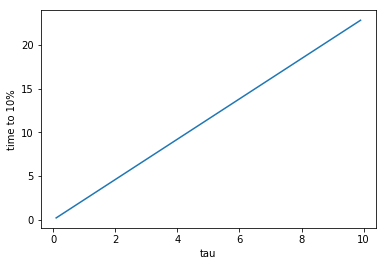

In [28]:
tauvalues=np.arange(0.1,10,0.1)
times_analytical=[scipy.optimize.newton(lambda t: np.exp(-t/tau)-0.1,0) for tau in tauvalues]
plt.plot(tauvalues,times_analytical)
plt.xlabel('tau')
plt.ylabel('time to 10%')
plt.show()

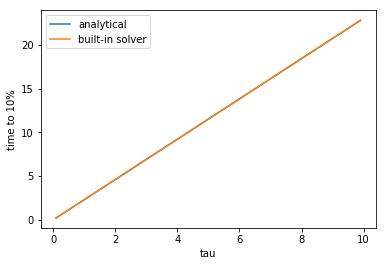

In [37]:
# another way:  use the built-in solver
times_solver=[]
for tau in tauvalues:    
    def dx_dt(t, x):
        return 1/tau*(-x)
    xsolution=solve_ivp(dx_dt, [0,4*tau], [x0],dense_output=True)
    def tosolve(t):
        return xsolution.sol(t)[0]-0.1*x0
    times_solver.append(scipy.optimize.newton(tosolve,tau))

plt.plot(tauvalues,times_analytical,label='analytical')
plt.plot(tauvalues,times_solver,label='built-in solver')
plt.xlabel('tau')
plt.ylabel('time to 10%')
plt.legend()
plt.show()
        
    

# (c)  Nonlinear equation

/Users/user/anaconda/envs/jd/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


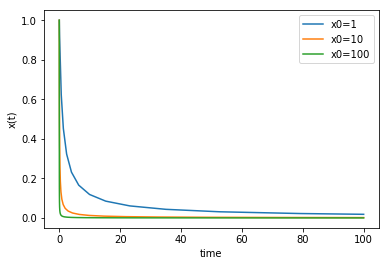

In [48]:
from scipy.integrate import solve_ivp
tau=1
x0=10
q=2.2
trange=[0,100]

def dx_dt(t, x):
    return 1/tau*(-x**q)
# show solution for different values of x0
for x0 in [1,10,100]:
    xsolution=solve_ivp(dx_dt, trange, [x0])
    plt.plot(xsolution.t,(xsolution.y[0])/x0,label='x0='+str(x0))
plt.legend()
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

## before getting time to reach 10% of starting value, get solutions and plot

In [40]:
from scipy.integrate import solve_ivp

q=2.2
trange=[0,100]
tauvalues=np.arange(1,11,1)
x0values=[1,10,100]

# make a loop that defines a function and then gets the solution for each value of tau
solutions=[]
for tau in tauvalues:
    def dx_dt(t, x):
        return 1/tau*(-x**q)
    solutions.append(solve_ivp(dx_dt, trange, x0values, dense_output=True))

/Users/user/anaconda/envs/jd/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in power
  if sys.path[0] == '':


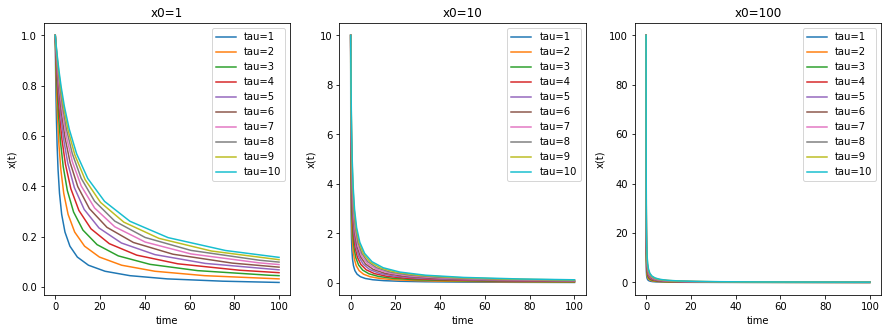

In [41]:
## First, plot the time-dependent solutions
f, axs = plt.subplots(1, 3)
f.set_size_inches(15,5)
for n in range(3):
    for snum in range(len(tauvalues)):    
        axs[n].plot(solutions[snum].t,solutions[snum].y[n],label='tau='+str(tauvalues[snum]))
    axs[n].set_title('x0='+str(x0values[n]))
    axs[n].legend()
    axs[n].set_xlabel('time')
    axs[n].set_ylabel('x(t)')

plt.show()

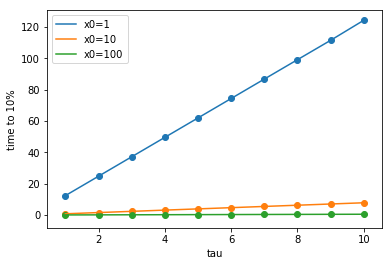

In [75]:
## Now find the time to reach 10% of the starting values
# I'll use the root finder, like above.  Note that dense_output=True is needed in order to do this

# this gets all the T values, where the function is 0.1 of its initial value.  This does a lot in one line!  To understand, start from the inside and go out
allT=[[scipy.optimize.newton(lambda t: solutions[snum].sol(t)[n]-0.1*x0values[n],0) for snum in range(len(tauvalues))] for n in range(3)]

for n in range(3):
    plt.scatter(tauvalues,allT[n])
    plt.plot(tauvalues,allT[n],label='x0='+str(x0values[n]))

plt.legend()
plt.xlabel('tau')
plt.ylabel('time to 10%')
plt.show()